### Análise de dados da Produção:



1.   Análise por tipo de vinho:
- Vinhos de mesa (tinto, branco e rosado)
- vinhos Finos de Mesa (tinto, branco e rosado)


2.   Impacto dos Fatores Climáticos:
- Dados de temperatura, precipitação e clima
- Fenômenos climáticos específicos

3.  Comparação com produção Nacional e Mundial
- Nacional, qual a participação na produção nacional
- Mundial, entender como o Brasil se posiciona mundialmente.



- Dados da vinícola
http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_03
- Dados da produção Nacional e Mundial
https://www.oiv.int/what-we-do/data-discovery-report?oiv

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Libs

import pandas as pd
import numpy as np

#libs gráficas
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

In [37]:
dados_producao = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS - 7DTAT/Dados_Vitivinicultura/Producao.csv", encoding = "ISO-8859-1",
            sep = ";", thousands=".", decimal=",")

# mostra as 5 primeiras linhas
dados_producao.head(8)


,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [38]:
dados_producao.columns

Index(['id', 'control', 'produto', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', '2023'],
      dtype='object')

In [39]:
# Verificando o tamanho da base de dados
dados_producao.shape

(51, 57)

In [40]:

dados_producao.dtypes

,0
id,int64
control,object
produto,object
1970,int64
1971,int64
1972,int64
1973,int64
1974,int64
1975,int64
1976,int64


In [41]:
dados_producao.isnull().sum().sum()

0

In [42]:
dados_producao.head(8)

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556
5,6,vv_Tinto,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,...,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,7,vv_Branco,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,...,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,8,vv_Rosado,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,...,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


### Quantidade Produzido pela Vinícola

In [43]:
# EXCLUINDO AS COLUNAS E LINHAS
# Selecionar as colunas 'control', 'produto' e colunas a partir de 2009
colunas_selecionadas = ['control',] + [col for col in dados_producao.columns if col.isdigit() and int(col) >= 2009]
# Selecionar as linhas com os IDs específicos: 2, 3, 4, 6, 7, 8 (SOMENTE OS VINHOS)
dados_producao_vinhos = dados_producao[dados_producao['id'].isin([2, 3, 4, 6, 7, 8])][colunas_selecionadas]
# exibir
dados_producao_vinhos

,control,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
5,vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
6,vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
7,vv_Rosado,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [44]:
# Renomenando a coluna para tipos e tornando index
dados_producao_vinhos = dados_producao_vinhos.rename(columns={'control': 'tipos'}).set_index('tipos')
dados_producao_vinhos.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipos,,,,,,,,,,,,,,,
vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437


In [45]:
dados_producao_vinhos = dados_producao_vinhos.astype(float)

In [46]:
dados_producao_vinhos.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

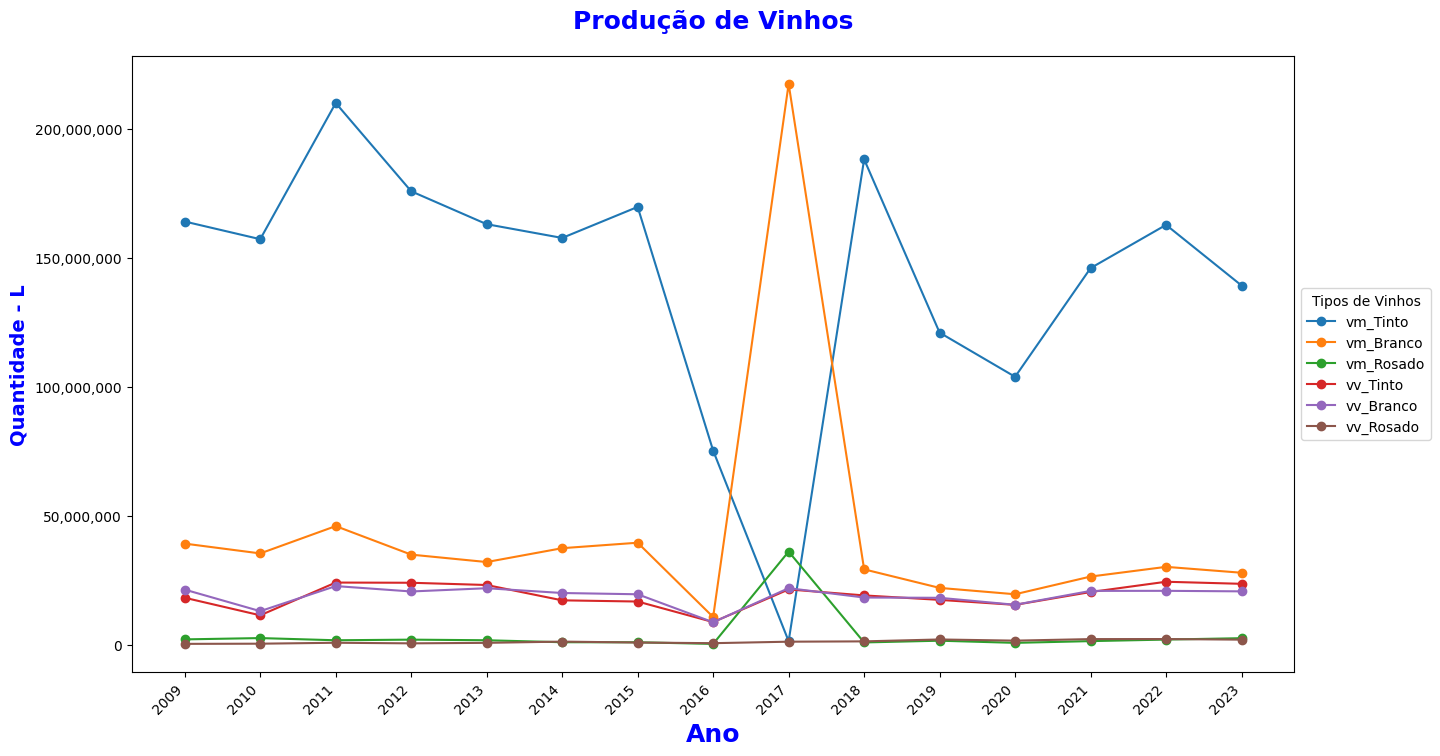

In [47]:
# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_producao_vinhos.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Exibindo os valores no gráfico
#for line in axis.lines:
 #   for x, y in zip(line.get_xdata(), line.get_ydata()):
  #      label = f"{y:,.2f}"      #f"{y:,.0f}" if not pd.isna(y) else ""  # Verifica se não é NaN antes de exibir
   #     axis.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Exibindo o gráfico
plt.show()


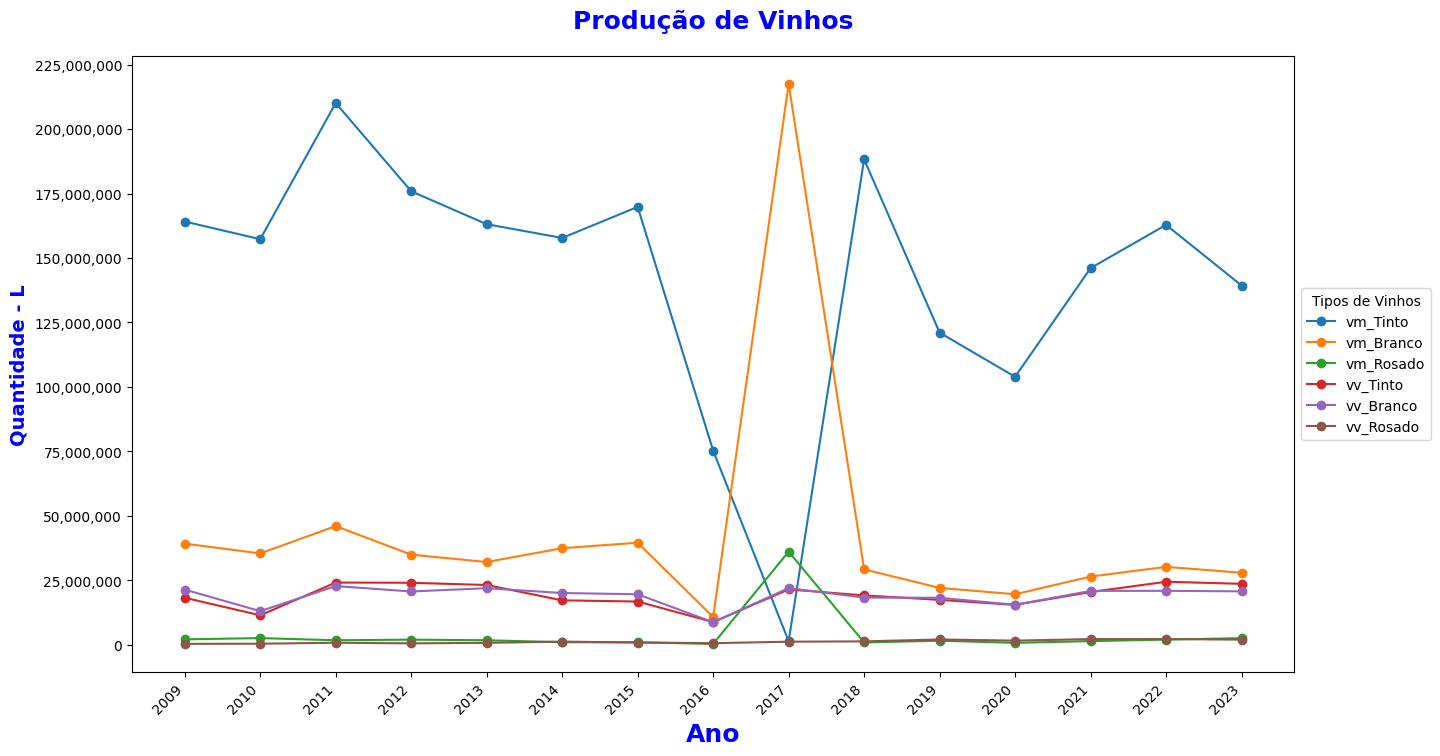

In [71]:
# Removendo as colunas dos tipos de vinhos 'vv_Rosado' e 'vm_Rosado'
dados_sem_rosados = dados_producao_vinhos.drop(columns=['vv_Rosado', 'vm_Rosado'], errors='ignore')


# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

# Exibindo os valores no gráfico
#for line in axis.lines:
 #   for x, y in zip(line.get_xdata(), line.get_ydata()):
  #      label = f"{y:,.2f}"      #f"{y:,.0f}" if not pd.isna(y) else ""  # Verifica se não é NaN antes de exibir
   #     axis.annotate(label, (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

# Exibindo o gráfico
plt.show()

In [74]:
dados_producao_vinhos.index

Index(['vm_Tinto', 'vm_Branco', 'vm_Rosado', 'vv_Tinto', 'vv_Branco',
       'vv_Rosado'],
      dtype='object', name='tipos')

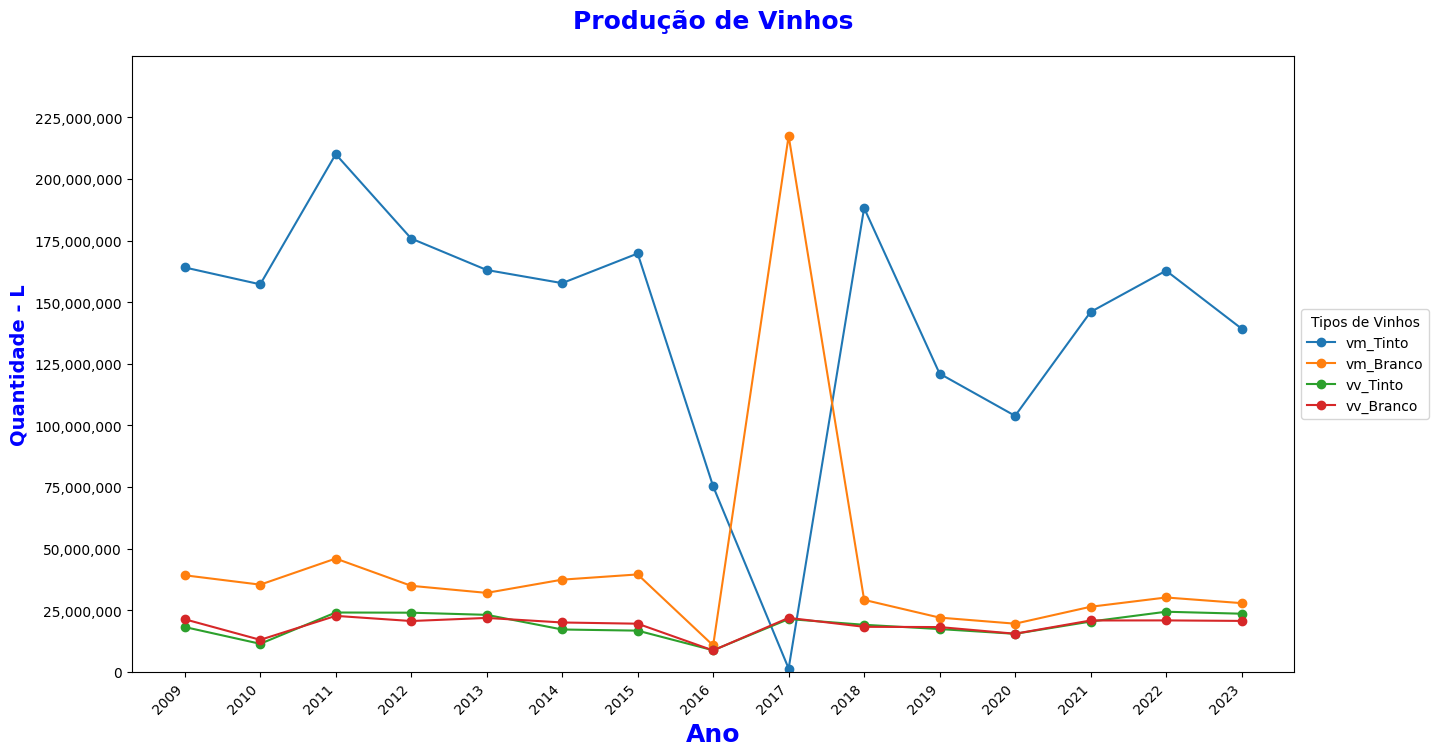

In [82]:

# Filtrando o DataFrame para remover as linhas com os vinhos 'vv_Rosado' e 'vm_Rosado' no índice
dados_sem_rosados = dados_producao_vinhos[~dados_producao_vinhos.index.isin(['vv_Rosado', 'vm_Rosado'])]

# Transpor o DataFrame para que os anos sejam o índice
dados_transposto = dados_sem_rosados.T

# Verifica se os anos estão como inteiros, caso contrário converte
if not pd.api.types.is_numeric_dtype(dados_transposto.index):
    dados_transposto.index = pd.to_numeric(dados_transposto.index, errors="coerce")

# Plotando o gráfico com os anos no eixo X
axis = dados_transposto.plot(figsize=(15, 8), marker='o')

# Formatação do eixo Y
# Define os intervalos de 25.000.000 para o eixo Y
y_ticks = np.arange(0, dados_transposto.max().max() + 25_000_000, 25_000_000)
axis.set_yticks(y_ticks)

# Formata os valores com separador de milhar
axis.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Formatação do eixo X
# Rotaciona os rótulos do eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')
# Garante que todos os anos apareçam no eixo X
plt.xticks(ticks=dados_transposto.index, labels=dados_transposto.index)

# Título e legendas
plt.title("Produção de Vinhos", fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Ano", fontsize=18, fontweight="bold", color="blue", loc="center")
plt.ylabel("Quantidade - L", fontsize=14, fontweight="bold", color="blue")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Tipos de Vinhos")

plt.ylim(0, 250_000_000)
# Exibindo o gráfico
plt.show()


### Produção Vinícola x Brasil x Mundial

In [48]:
# PLANILHA EXTERNA DE PRODUÇÃO MUNDIAL.
dados_producao_mundial = pd.read_csv("/content/drive/MyDrive/DATA ANALYTICS - 7DTAT/Notebooks/Produção - Evandro/Produção_Mundial.csv",
            sep = ";", thousands=".", decimal=",")

In [49]:
# Verificando o data frame
dados_producao_mundial
dados_producao_mundial.head()

,Rótulos de Linha,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Total Geral
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
1,Albania,17500000,18100000,18000000,19000000,18000000,17500000,16400000,17800000,16900000,15300000,18700000,19200000,29500000,22800000,NaN,264700000
2,Algeria,58800000,47500000,48000000,49200000,49800000,12600000,9600000,6600000,22700000,19300000,19300000,19400000,18300000,18000000,NaN,399100000
3,American Samoa,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
4,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0


In [50]:
# Verificando as colunas
dados_producao_mundial.columns

Index(['Rótulos de Linha', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Total Geral'],
      dtype='object')

In [51]:
dados_producao_mundial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rótulos de Linha  219 non-null    object 
 1   2009              217 non-null    float64
 2   2010              219 non-null    int64  
 3   2011              219 non-null    int64  
 4   2012              219 non-null    int64  
 5   2013              219 non-null    int64  
 6   2014              219 non-null    int64  
 7   2015              219 non-null    int64  
 8   2016              219 non-null    int64  
 9   2017              219 non-null    int64  
 10  2018              219 non-null    int64  
 11  2019              219 non-null    int64  
 12  2020              219 non-null    int64  
 13  2021              219 non-null    int64  
 14  2022              219 non-null    int64  
 15  2023              37 non-null     float64
 16  Total Geral       219 non-null    float64
dt

In [52]:
# Excluindo renomeando a coluna País e transformando em Indexz
dados_producao_mundial = dados_producao_mundial.rename(columns={"Rótulos de Linha": "País"}).set_index("País")


In [53]:
dados_producao_mundial
dados_producao_mundial.loc["Italy"]

,Italy
2009,4731400000
2010,4852500000
2011,4277200000
2012,4561600000
2013,5402900000
2014,4422900000
2015,4999600000
2016,5092000000
2017,4250000000
2018,5478300000


In [54]:
dados_producao_vinhos

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
tipos,,,,,,,,,,,,,,,
vm_Tinto,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
vm_Branco,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
vm_Rosado,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
vv_Tinto,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918,23615783
vv_Branco,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613,20693437
vv_Rosado,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265,1959336


In [55]:
# Dados da nossa vinícola
total_vinicola = dados_producao_vinhos.sum(axis=0)
pd.options.display.float_format = '{:.0f}'.format
total_vinicola

,0
2009,245318774
2010,220073693
2011,305439220
2012,257977767
2013,242686752
2014,234637437
2015,247457542
2016,104389641
2017,299553057
2018,257082856


## Quantidade Produzida por País

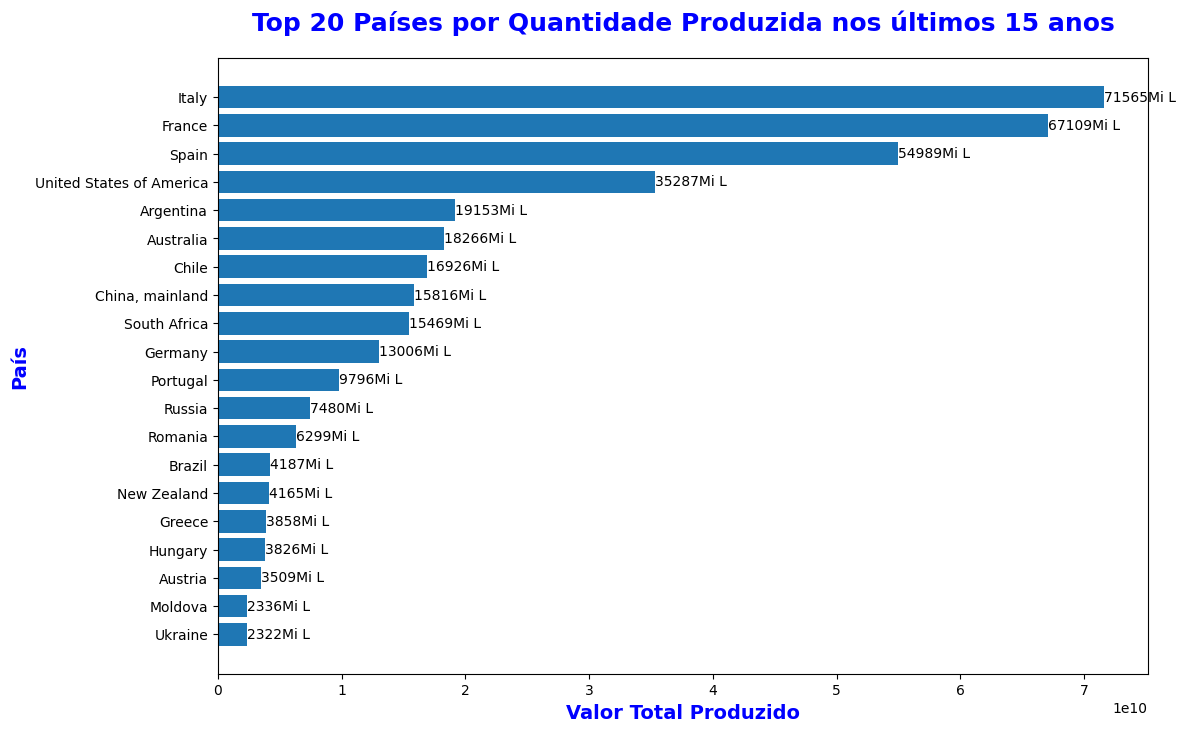

In [56]:
# Gráfico de barras horizontal para mostrar o valor produzido por País
# Agrupar os dados por país e somar os valores
valor_por_pais  = dados_producao_mundial.groupby("País")["Total Geral"].sum().sort_values(ascending=False)

# Excluir a linha global
valor_por_pais.drop("Global", inplace=True)

# Selecionar apenas os 20 países que mais exportam
top_20_paises = valor_por_pais.head(20)
plt.figure(figsize=(12, 8))


# Criar o gráfico de barras horizontais
plt.barh(top_20_paises.index, top_20_paises.values)

# Adicionar título e rótulos
plt.title("Top 20 Países por Quantidade Produzida nos últimos 15 anos",fontsize=18, fontweight="bold", color="blue", loc="center", pad=20)
plt.xlabel("Valor Total Produzido",fontsize=14, fontweight="bold", color="blue")
plt.ylabel("País", fontsize=14, fontweight="bold", color="blue")

# Adicionar rótulos de valor dentro das barras
for index, value in enumerate(top_20_paises.values):
    plt.text(value, index, f'{value/1e6:.0f}Mi L', va="center", ha="left", color="Black")

# Inverter a ordem do eixo y para que o país com maior exportação apareça no topo
plt.gca().invert_yaxis()

In [57]:
dados_producao_mundial.columns

Index(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022', '2023', 'Total Geral'],
      dtype='object')

In [58]:
dados_producao_mundial.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela', 'Vietnam', 'Virgin Islands', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='País', length=219)

In [59]:
dados_producao_mundial.loc["Global"]

,Global
2009,26925400000
2010,26180000000
2011,26773300000
2012,26064200000
2013,29221700000
2014,27045300000
2015,27710000000
2016,27054500000
2017,24830000000
2018,29464100000


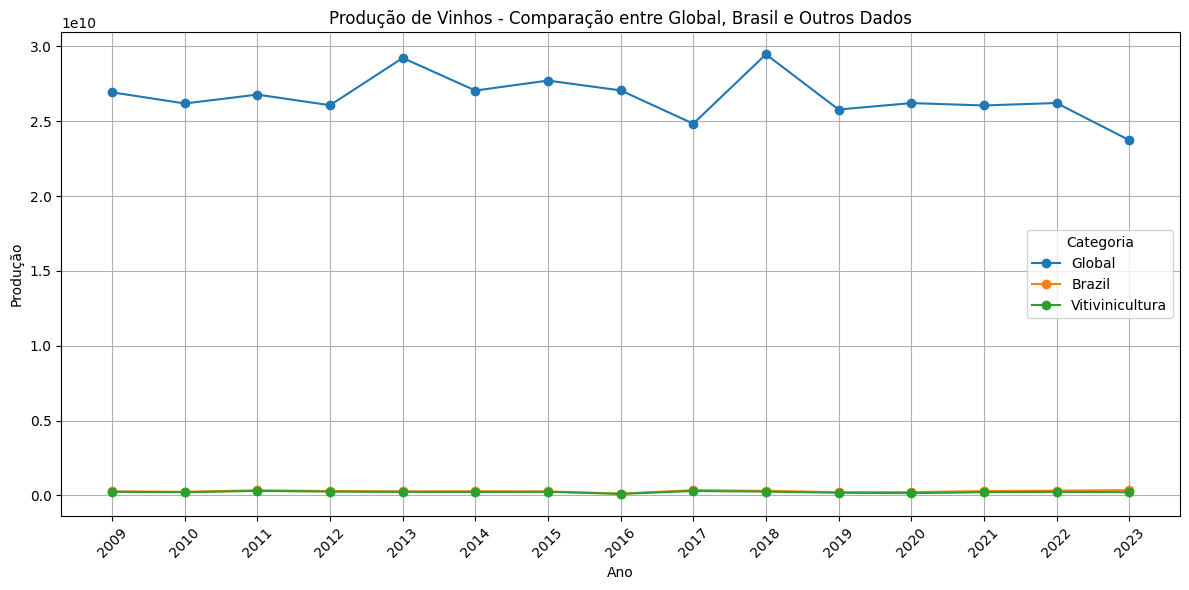

In [60]:
# Selecionar dados de "Global" e "Brasil"
selecionados =  dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop('Total Geral', errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Outro']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
for coluna in combinado.columns:
    plt.plot(combinado.index, combinado[coluna], marker='o', label=coluna)

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação entre Global, Brasil e Outros Dados')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [61]:
# Verificar os dados originais do Brasil no dataframe completo
valores_brasil_originais = dados_producao_mundial.loc['Brazil']
print(valores_brasil_originais)


2009           272000000
2010           245900000
2011           346000000
2012           296700000
2013           271000000
2014           281000000
2015           269900000
2016           125700000
2017           355300000
2018           308400000
2019           217600000
2020           225700000
2021           292800000
2022           320000000
2023           358700000
Total Geral   4186700000
Name: Brazil, dtype: float64


Dados selecionados antes da transposição:
               2009         2010         2011         2012         2013  \
País                                                                     
Global 26925400000  26180000000  26773300000  26064200000  29221700000   
Brazil   272000000    245900000    346000000    296700000    271000000   

               2014         2015         2016         2017         2018  \
País                                                                      
Global  27045300000  27710000000  27054500000  24830000000  29464100000   
Brazil    281000000    269900000    125700000    355300000    308400000   

               2019         2020         2021         2022        2023  \
País                                                                     
Global  25776400000  26205900000  26048800000  26210700000 23734000000   
Brazil    217600000    225700000    292800000    320000000   358700000   

        Total Geral  
País                 
Global 39924400000

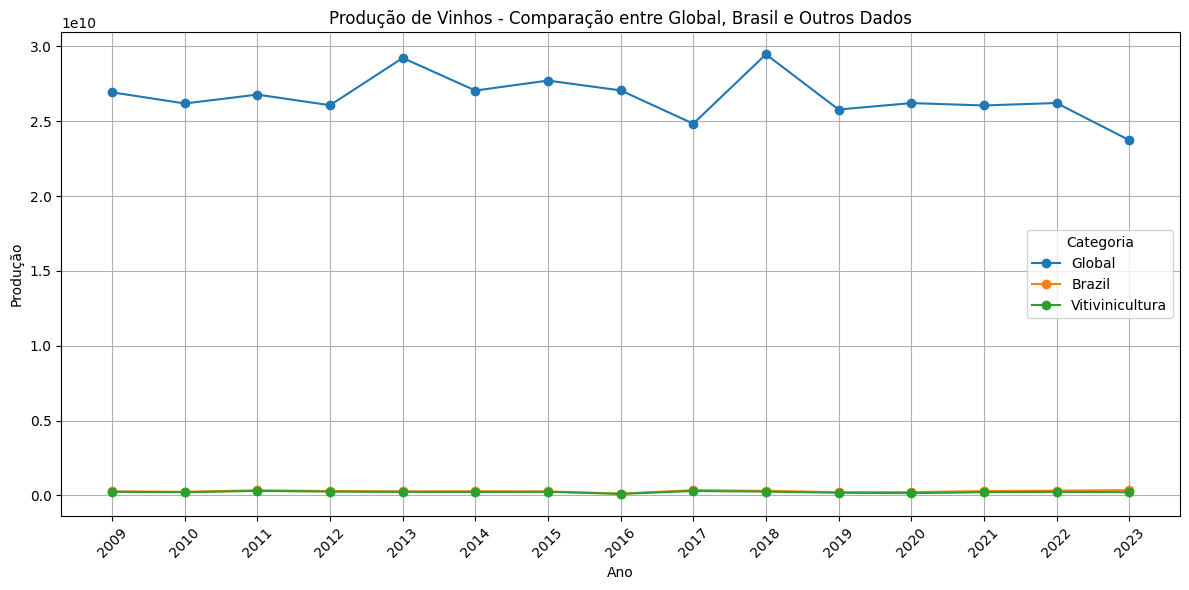

In [62]:

# Selecionar dados de "Global" e "Brasil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Verificar se os dados foram selecionados corretamente
print("Dados selecionados antes da transposição:\n", selecionados)

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Verificar se a transposição foi correta
print("Dados após transposição:\n", selecionados)

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Outro']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Verificar se a combinação está correta
print("Dataframe combinado:\n", combinado)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
for coluna in combinado.columns:
    plt.plot(combinado.index, combinado[coluna], marker='o', label=coluna)

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação entre Global, Brasil e Outros Dados')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


Dataframe combinado:
           Global    Brazil  Vitivinicultura
2009 26925400000 272000000        245318774
2010 26180000000 245900000        220073693
2011 26773300000 346000000        305439220
2012 26064200000 296700000        257977767
2013 29221700000 271000000        242686752
2014 27045300000 281000000        234637437
2015 27710000000 269900000        247457542
2016 27054500000 125700000        104389641
2017 24830000000 355300000        299553057
2018 29464100000 308400000        257082856
2019 25776400000 217600000        182245159
2020 26205900000 225700000        156717100
2021 26048800000 292800000        217374993
2022 26210700000 320000000        242543408
2023 23734000000 358700000        216030985


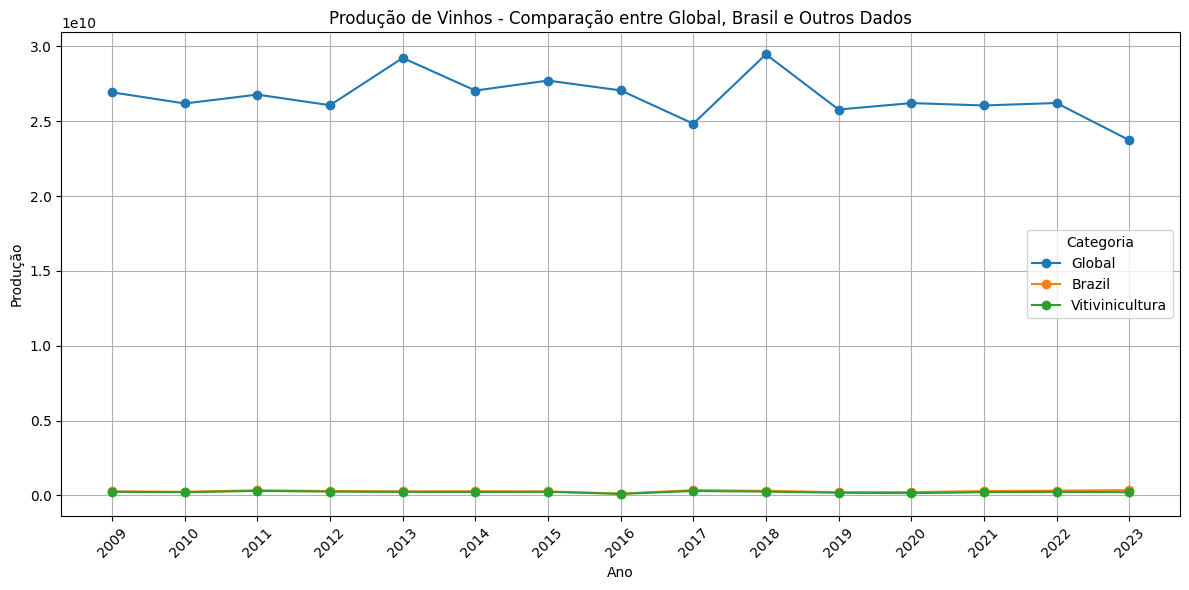

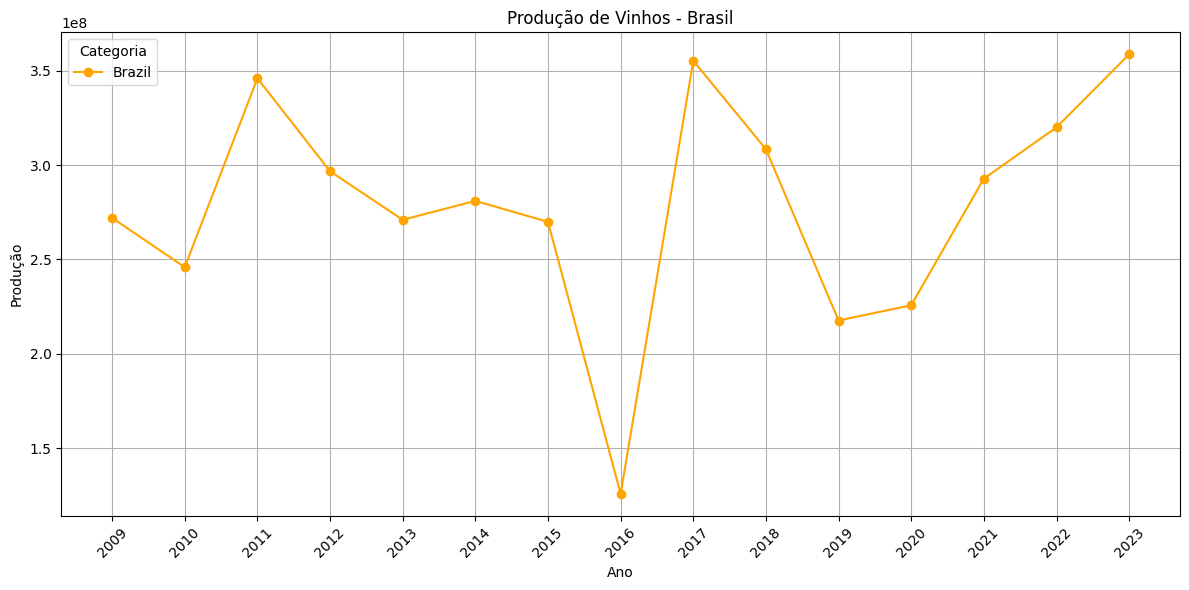

In [63]:

# Selecionar dados de "Global" e "Brasil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Outro']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Verificar se a combinação está correta
print("Dataframe combinado:\n", combinado)

# Plotar o gráfico de linhas para todos os dados
plt.figure(figsize=(12, 6))
for coluna in combinado.columns:
    plt.plot(combinado.index, combinado[coluna], marker='o', label=coluna)

# Personalizar o gráfico completo
plt.title('Produção de Vinhos - Comparação entre Global, Brasil e Outros Dados')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotar apenas os dados do Brasil para verificação
plt.figure(figsize=(12, 6))
plt.plot(combinado.index, combinado['Brazil'], marker='o', label='Brazil', color='orange')
plt.title('Produção de Vinhos - Brasil')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


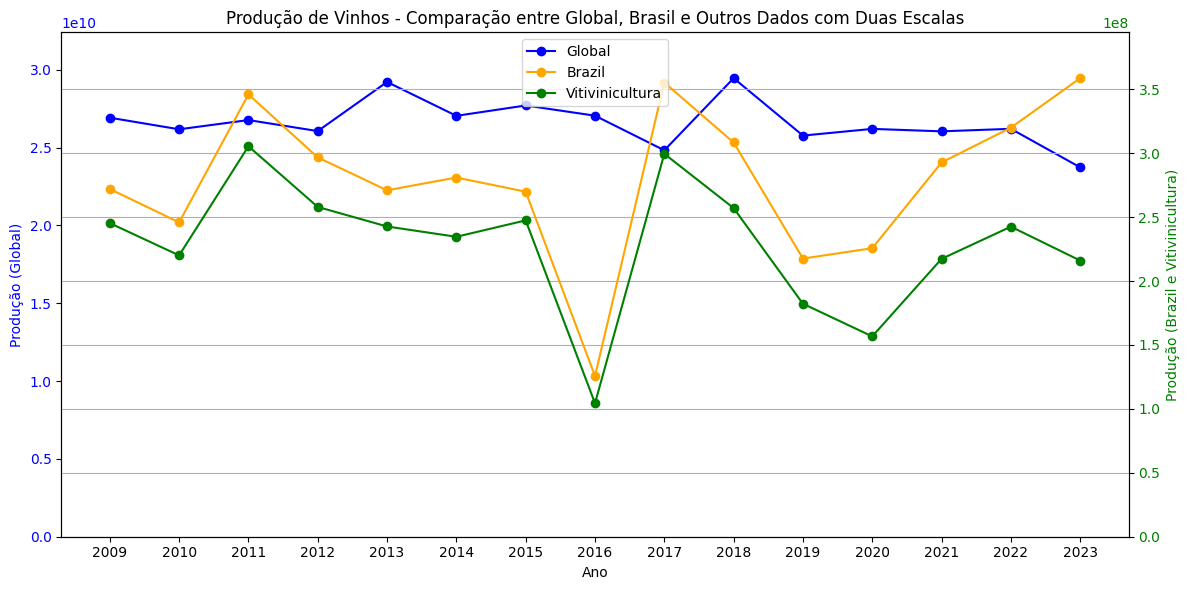

In [64]:

# Selecionar dados de "Global" e "Brasil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Outro']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar dados de "Global" no eixo esquerdo
ax1.plot(combinado.index, combinado['Global'], marker='o', color='blue', label='Global')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Produção (Global)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, combinado['Global'].max() * 1.1])  # Ajustar limites

# Criar um segundo eixo para os dados de "Brazil" e "Vitivinicultura"
ax2 = ax1.twinx()  # Compartilha o mesmo eixo x
ax2.plot(combinado.index, combinado['Brazil'], marker='o', color='orange', label='Brazil')
ax2.plot(combinado.index, combinado['Vitivinicultura'], marker='o', color='green', label='Vitivinicultura')
ax2.set_ylabel('Produção (Brazil e Vitivinicultura)', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim([0, combinado[['Brazil', 'Vitivinicultura']].max().max() * 1.1])  # Ajustar limites

# Adicionar legendas separadamente para cada eixo
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center')

# Título e ajustes finais
plt.title('Produção de Vinhos - Comparação entre Global, Brasil e Outros Dados com Duas Escalas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


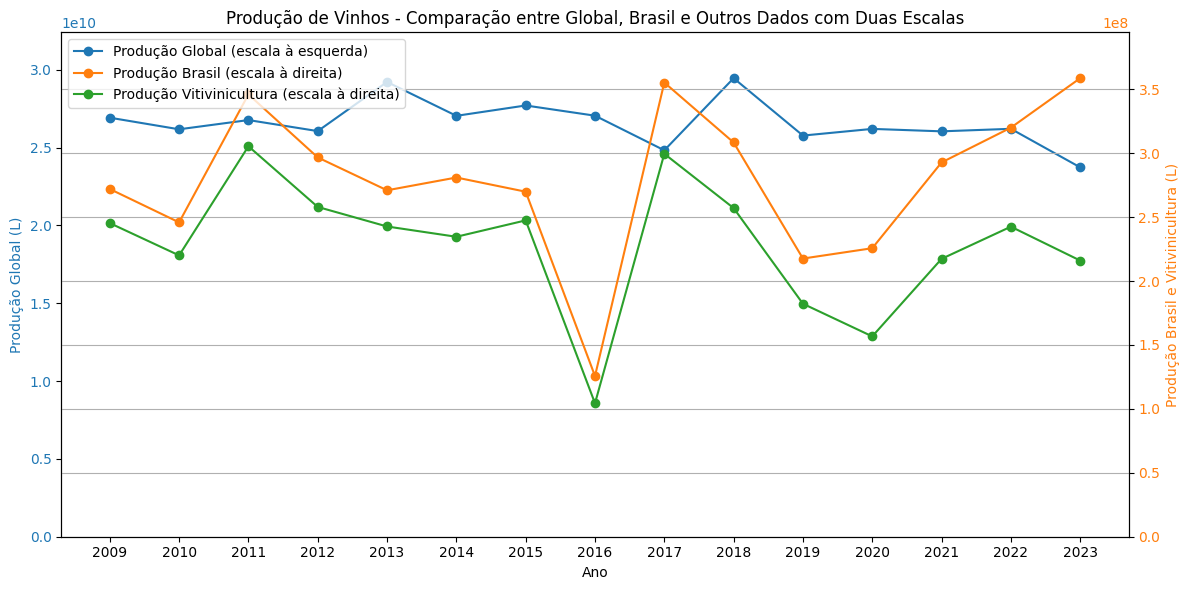

In [65]:
# Selecionar dados de "Global" e "Brasil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Outro']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Criar figura e eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotar dados de "Global" no eixo esquerdo
color1 = 'tab:blue'
ax1.plot(combinado.index, combinado['Global'], marker='o', color=color1, label='Produção Global (escala à esquerda)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('Produção Global (L)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim([0, combinado['Global'].max() * 1.1])  # Ajustar limites

# Criar um segundo eixo para os dados de "Brazil" e "Vitivinicultura"
ax2 = ax1.twinx()  # Compartilha o mesmo eixo x
color2 = 'tab:orange'
color3 = 'tab:green'
ax2.plot(combinado.index, combinado['Brazil'], marker='o', color=color2, label='Produção Brasil (escala à direita)')
ax2.plot(combinado.index, combinado['Vitivinicultura'], marker='o', color=color3, label='Produção Vitivinicultura (escala à direita)')
ax2.set_ylabel('Produção Brasil e Vitivinicultura (L)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim([0, combinado[['Brazil', 'Vitivinicultura']].max().max() * 1.1])  # Ajustar limites

# Ajustar legendas para cada eixo separadamente
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(0, 1))

# Adicionar rótulos específicos para diferenciar as escalas
ax1.yaxis.set_label_position("left")
ax2.yaxis.set_label_position("right")
ax1.yaxis.tick_left()
ax2.yaxis.tick_right()

# Título e ajustes finais
plt.title('Produção de Vinhos - Comparação entre Global, Brasil e Outros Dados com Duas Escalas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


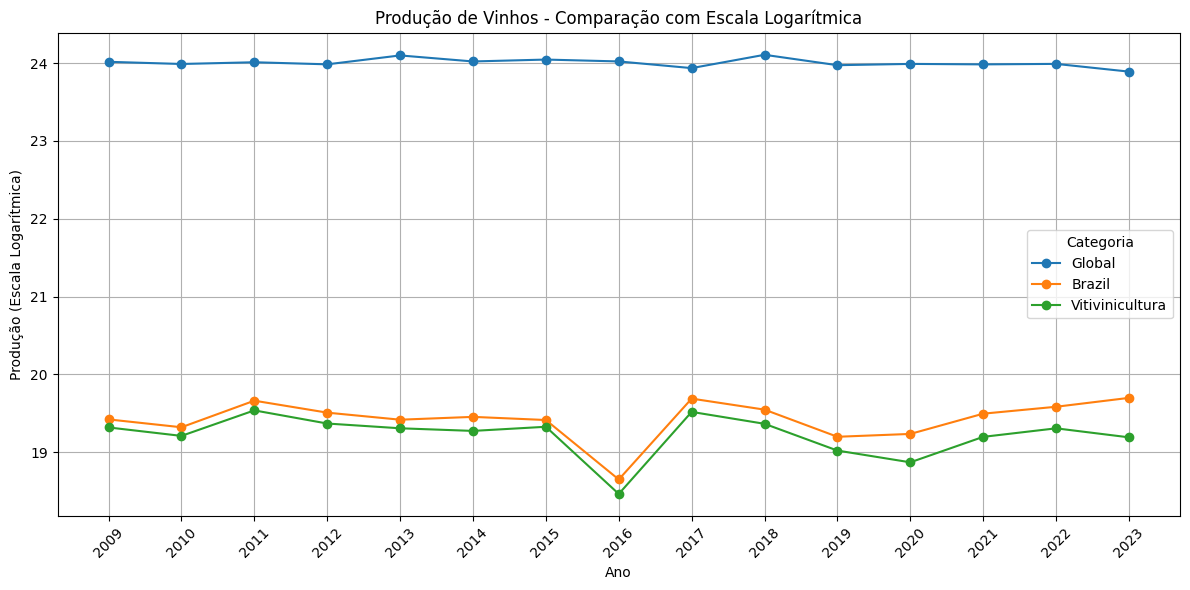

In [66]:
# Selecionar dados de "Global" e "Brazil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Vitivinicultura']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Aplicar transformação logarítmica (adiciona 1 para evitar log(0))
combinado_log = np.log(combinado + 1)

# Plotar o gráfico com escala logarítmica
plt.figure(figsize=(12, 6))
for coluna in combinado_log.columns:
    plt.plot(combinado_log.index, combinado_log[coluna], marker='o', label=coluna)

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação com Escala Logarítmica')
plt.xlabel('Ano')
plt.ylabel('Produção (Escala Logarítmica)')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Exibir o gráfico
plt.show()


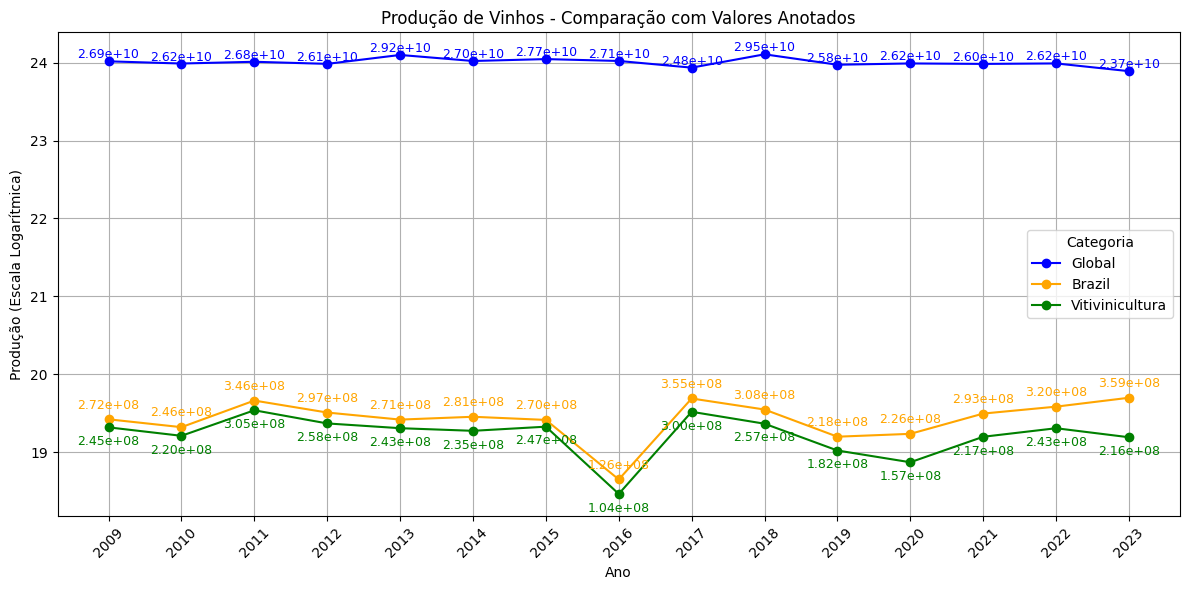

In [67]:

# Selecionar dados de "Global" e "Brazil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Vitivinicultura']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Aplicar transformação logarítmica (adiciona 1 para evitar log(0))
combinado_log = np.log(combinado + 1)

# Plotar o gráfico com escala logarítmica
plt.figure(figsize=(12, 6))
cores = {'Global': 'blue', 'Brazil': 'orange', 'Vitivinicultura': 'green'}
for coluna in combinado_log.columns:
    plt.plot(combinado_log.index, combinado_log[coluna], marker='o', label=coluna, color=cores[coluna])

    # Adicionar os valores nas linhas
    for i, valor in enumerate(combinado_log[coluna]):
        # Formatar valor em milhões
        valor_formatado = f'{np.exp(valor) - 1:.2e}'
        if coluna == 'Brazil':
            plt.text(combinado_log.index[i], valor + 0.1, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
        elif coluna == 'Vitivinicultura':
            plt.text(combinado_log.index[i], valor - 0.1, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='top')
        else:
            plt.text(combinado_log.index[i], valor, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação com Valores Anotados')
plt.xlabel('Ano')
plt.ylabel('Produção (Escala Logarítmica)')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


<ipython-input-34-38e41aeb2d7f>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(combinado_log.index[i], combinado_log[coluna][i], valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
<ipython-input-34-38e41aeb2d7f>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(combinado_log.index[i], combinado_log[coluna][i] + 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
<ipython-input-34-38e41aeb2d7f>:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

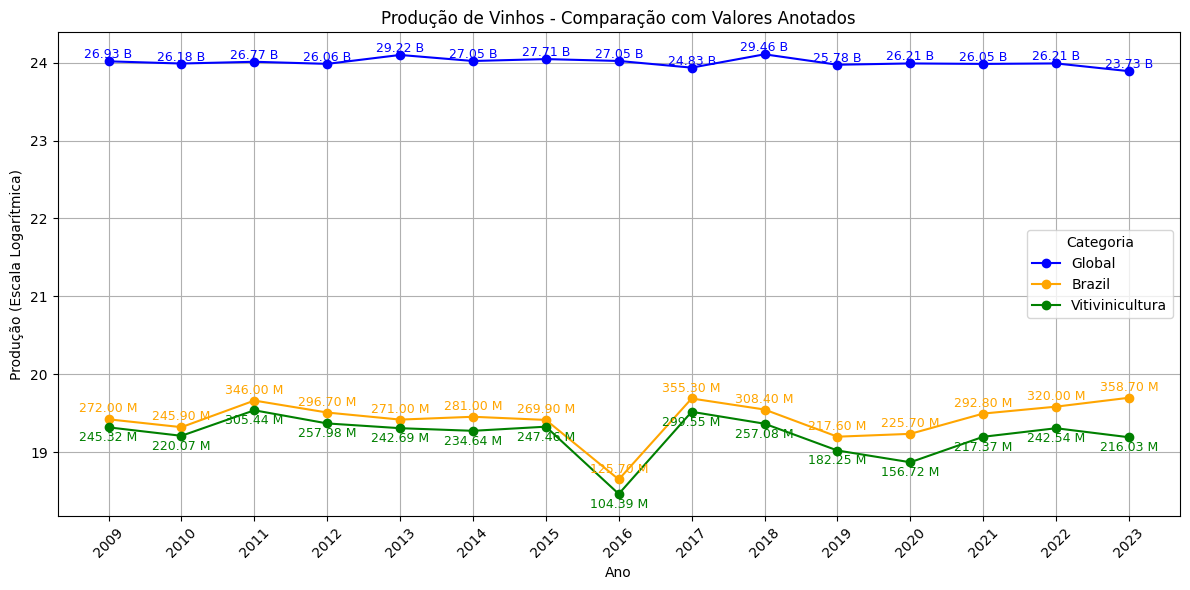

In [34]:
# Selecionar dados de "Global" e "Brazil"
selecionados = dados_producao_mundial.loc[['Global', 'Brazil']]

# Transpor o dataframe para que os anos sejam as linhas e as regiões sejam as colunas
selecionados = selecionados.T
selecionados = selecionados.drop(['Total Geral'], errors='ignore')
selecionados = selecionados.dropna().astype(float)  # Remover NaNs e converter para float

# Renomear a coluna do segundo dataframe para "Outro" ou conforme necessário
total_vinicola.columns = ['Vitivinicultura']

# Verificar se 'total_vinicola' é uma série e adicionar um nome
if isinstance(total_vinicola, pd.Series):
    total_vinicola.name = 'Vitivinicultura'  # Nome da série

# Combinar os dataframes pelo índice (anos)
combinado = selecionados.join(total_vinicola, how='inner')

# Aplicar transformação logarítmica (adiciona 1 para evitar log(0))
combinado_log = np.log(combinado + 1)

# Função para formatar valores em milhões (M) e bilhões (B)
def formatar_valor(valor):
    if valor >= 1e9:
        return f'{valor/1e9:.2f} B'
    elif valor >= 1e6:
        return f'{valor/1e6:.2f} M'
    else:
        return f'{valor:.2f}'

# Plotar o gráfico com escala logarítmica
plt.figure(figsize=(12, 6))
cores = {'Global': 'blue', 'Brazil': 'orange', 'Vitivinicultura': 'green'}
for coluna in combinado_log.columns:
    plt.plot(combinado_log.index, combinado_log[coluna], marker='o', label=coluna, color=cores[coluna])

    # Adicionar os valores nas linhas com formatação adequada
    for i, valor in enumerate(combinado[coluna]):
        valor_formatado = formatar_valor(valor)
        if coluna == 'Brazil':
            plt.text(combinado_log.index[i], combinado_log[coluna][i] + 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')
        elif coluna == 'Vitivinicultura':
            plt.text(combinado_log.index[i], combinado_log[coluna][i] - 0.05, valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='top')
        else:
            plt.text(combinado_log.index[i], combinado_log[coluna][i], valor_formatado, fontsize=9, color=cores[coluna], ha='center', va='bottom')

# Personalizar o gráfico
plt.title('Produção de Vinhos - Comparação com Valores Anotados')
plt.xlabel('Ano')
plt.ylabel('Produção (Escala Logarítmica)')
plt.legend(title='Categoria')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()
